# Exercise Synopsys

Before opening their APIs to the public, CitiBank's Chief Digital Officer is keen in exploring new revenue streams to monetize the larges amount of data they've been historically collecting. He knows other financial institutions are doing business with their data, but he still needs to define specific use cases in which his credit card transaction data can add real value. As Senior Data Scientists, the CDO assigns you with the key task of exploring in depth the data stored in your data centers and make a solid assessment of the real value provided by it. You will present this business case in Citibank's annual convention. 

# Pip Installs

In [2]:
#!pip install plotly
#!pip install squarify
#pip install geopandas
#pip install dash

In [3]:
#pip install plotly

# Imports

In [4]:
from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import pandas as pd
import numpy as np
import plotnine as p9
import squarify
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Importing dataframe
    

In [5]:
df = pd.read_csv ("madrid_transactions.csv")

The dataset provided contains more than 10,000 credit card transactions performed by tourists in the city of Madrid during a month. CitiBank's DBA has already cleaned the file and uploaded it to the Campus Online, so you can solely focus on analyzing the different consumption patterns from tourists. The goal is to discover different insights from the data through data visualization (with GGPlot2) and then transform them into potential business outcomes. 

# Examples of Business Cases

- Is there a particular time in which tourists are buying?
- Which nationality has the highest average ticket and why?
- Is there any relationship between day of the week and consumption?
- Do high end fashion retailers need to focus more on attracting Australian visitors than on Chinese? Why? 

# Pandas EDA

### Making a backup of original dataframe

In [6]:
df_original = df.copy()

### Moving on with EDA

In [7]:
df.head()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday


In [8]:
df.tail()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
10788,10789,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00,friday
10789,10790,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00,friday
10790,10791,48.25,Bars & restaurants,US,Midnight,23,2012-03-02 23:01:19+00,friday
10791,10792,368.90,Bars & restaurants,MY,Night,22,2012-03-02 22:35:46+00,friday
10792,10793,452.55,Bars & restaurants,CN,Afternoon,15,2012-03-01 15:27:26+00,thursday


In [9]:
df.describe()

,Unnamed: 0,amount,hour
count,10793.000000,10793.000000,10793.000000
mean,5397.000000,108.735644,15.032428
std,3115.815062,310.303331,4.809074
min,1.000000,0.040000,0.000000
25%,2699.000000,19.900000,12.000000
50%,5397.000000,39.990000,16.000000
75%,8095.000000,92.680000,18.000000
max,10793.000000,15000.000000,23.000000


Column Unnamed: 0 must be removed, it adds no value

In [10]:
del df['Unnamed: 0']

In [11]:
#columns are now clean
df.head(1)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday


In [12]:
#making sure we got thurdays and fridays consistent with column tx_date_proc
df.iloc[5700:5800,:]

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
5700,24.95,Fashion & Shoes,GB,Mid morning,11,2012-03-02 11:33:21+00,friday
5701,54.90,Fashion & Shoes,FR,Mid morning,11,2012-03-02 11:47:53+00,friday
5702,219.60,Fashion & Shoes,BR,Mid morning,11,2012-03-02 11:50:50+00,friday
5703,52.90,Fashion & Shoes,IT,Mid morning,11,2012-03-02 11:51:50+00,friday
5704,29.90,Fashion & Shoes,TW,Afternoon,12,2012-03-02 12:00:04+00,friday
...,...,...,...,...,...,...,...
5795,25.98,Fashion & Shoes,FI,Afternoon,16,2012-03-02 16:06:40+00,friday
5796,97.75,Fashion & Shoes,FR,Afternoon,16,2012-03-02 16:08:00+00,friday
5797,18.85,Fashion & Shoes,SE,Afternoon,16,2012-03-02 16:09:14+00,friday
5798,67.00,Fashion & Shoes,US,Afternoon,16,2012-03-02 16:10:02+00,friday


### Feature engineering adjustment to have date and time separated

In [13]:
df.tx_date_proc = df.tx_date_proc.apply(pd.to_datetime)

In [14]:
df['Day'] = [d.date() for d in df['tx_date_proc']]
df['Time'] = [d.time() for d in df['tx_date_proc']]
df.tail(30)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time
10763,17.15,Food,US,Night,22,2012-03-01 22:12:02+00:00,thursday,2012-03-01,22:12:02
10764,192.65,Other goods and services,NL,Midnight,23,2012-03-01 23:23:01+00:00,thursday,2012-03-01,23:23:01
10765,200.00,Bars & restaurants,IT,Midnight,23,2012-03-01 23:48:00+00:00,thursday,2012-03-01,23:48:00
10766,1172.22,Accommodation,US,Morning,6,2012-03-02 06:50:17+00:00,friday,2012-03-02,06:50:17
10767,69.95,Accommodation,US,Morning,7,2012-03-02 07:23:41+00:00,friday,2012-03-02,07:23:41
10768,90.15,Accommodation,CN,Mid morning,9,2012-03-02 09:57:36+00:00,friday,2012-03-02,09:57:36
10769,455.00,Accommodation,RU,Mid morning,10,2012-03-02 10:29:35+00:00,friday,2012-03-02,10:29:35
10770,394.00,Fashion & Shoes,CL,Mid morning,11,2012-03-02 11:15:57+00:00,friday,2012-03-02,11:15:57
10771,244.00,Fashion & Shoes,IL,Mid morning,11,2012-03-02 11:34:59+00:00,friday,2012-03-02,11:34:59
10772,21.60,Health,SE,Mid morning,11,2012-03-02 11:38:59+00:00,friday,2012-03-02,11:38:59


Dates are consistent with the thursdays and fridays

### Feature engineering adjustment to have continent

In [15]:
country_df = pd.read_csv("country-and-continent-codes-list.csv")

In [17]:
df = df.join(country_df.set_index('Two_Letter_Country_Code'), on = 'customer_country')


Expanded information about the country and continent

In [19]:
del df['Three_Letter_Country_Code']

In [20]:
del df['Country_Number']

### Continue with Pandas EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

We converted the tx_date_proc column to a pure datetime64 format and added continents

# Geographical plot

In [22]:

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [64]:
country_code = pd.read_csv ("all.csv")

In [65]:
countries = world.merge(country_code, left_on="iso_a3", right_on="alpha-3")

In [67]:
df3 = df.groupby('customer_country')['amount'].sum().reset_index(name ='Total_Expenditure')
df4 = df.groupby('customer_country')['amount'].count().reset_index(name ='Total_Transactions')
df5 = df.groupby('customer_country')['amount'].mean().reset_index(name ='Avg_Ticket')

In [68]:
int_df = countries.merge(df3, left_on="alpha-2", right_on="customer_country")
int_df1 = int_df.merge(df4, left_on="alpha-2", right_on="customer_country")
sales_df = int_df1.merge(df5, left_on="alpha-2", right_on="customer_country")


In [63]:
sales_df

,pop_est,continent,name_x,iso_a3,gdp_md_est,geometry,name_y,alpha-2,alpha-3,country-code,...,intermediate-region,region-code,sub-region-code,intermediate-region-code,customer_country_x,Total_Expenditure,customer_country_y,Total_Transactions,customer_country,Avg_Ticket
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,CAN,124,...,NaN,19.0,21.0,NaN,CA,26154.26,CA,242,CA,108.075455
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,US,USA,840,...,NaN,19.0,21.0,NaN,US,184196.77,US,1686,US,109.250753
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KZ,KAZ,398,...,NaN,142.0,143.0,NaN,KZ,14441.38,KZ,80,KZ,180.517250
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,UZ,UZB,860,...,NaN,142.0,143.0,NaN,UZ,675.18,UZ,13,UZ,51.936923
4,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,ID,IDN,360,...,NaN,142.0,35.0,NaN,ID,13953.64,ID,39,ID,357.785641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,100388073.0,Africa,Egypt,EGY,303092,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,EG,EGY,818,...,NaN,2.0,15.0,NaN,EG,6967.08,EG,73,EG,95.439452
98,44269594.0,Africa,Uganda,UGA,35165,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",Uganda,UG,UGA,800,...,Eastern Africa,2.0,202.0,14.0,UG,324.90,UG,2,UG,162.450000
99,3301000.0,Europe,Bosnia and Herz.,BIH,20164,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,BA,BIH,70,...,NaN,150.0,39.0,NaN,BA,317.21,BA,7,BA,45.315714
100,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,MK,MKD,807,...,NaN,150.0,39.0,NaN,MK,207.90,MK,8,MK,25.987500


# TARGET, ATRACT, RETAIN AND ENGAGE

## GOAL:

Increase credit card usage and spending among Citi credit cardholders visiting the city of Madrid by:

- Creating marketing campaings that will leverage data from their past consumer behavior
- Targeting our customers more precisely through smarter segmentation
- Developing a better value proposition to enhance the customer experience

## DEFINING TARGET AUDIENCE:

We are going to identify the customers with a high propensity to respond to our marketing campaigns. To do so, we will segment our customers based on past spendings, utilization (amount of transactions), average ticket size, total expenditure, expenditure by product category, nationality and daytime spending patterns.

### Lets start undestanding our Customers

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


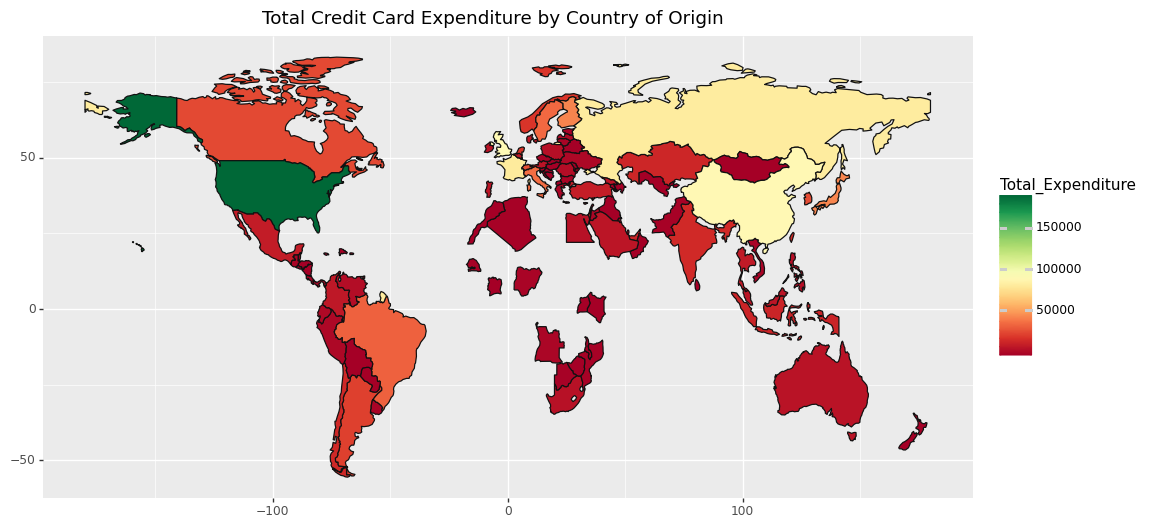

<ggplot: (123019745085)>

In [72]:
chart = ggplot(data=sales_df, mapping=aes(fill="Total_Expenditure"))
map_proj = geom_map()
labels = labs(title="Total Credit Card Expenditure by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="RdYlGn")
color_colormap = scale_color_cmap(cmap_name="RdYlGn")

world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap

world_map_card

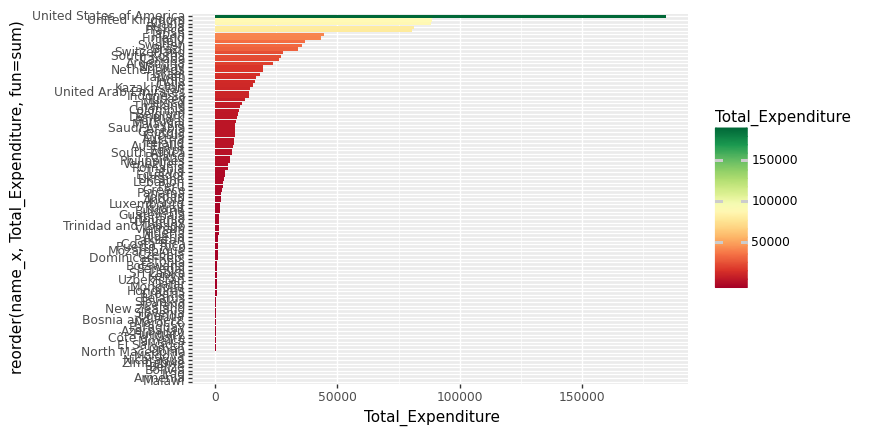

<ggplot: (123028323875)>

In [78]:
ggplot(sales_df, aes(x = 'reorder(name_x, Total_Expenditure, fun=sum)', y = 'Total_Expenditure', fill='Total_Expenditure')) + geom_bar(stat="identity")+ scale_x_discrete()+ coord_flip()+scale_fill_cmap(cmap_name="RdYlGn")


In [82]:
df.head()

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time,Continent_Name,Continent_Code,Country_Name
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00:00,thursday,2012-03-01,21:51:54,Europe,EU,United Kingdom of Great Britain & Northern Ire...
1,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00:00,friday,2012-03-02,16:12:52,Europe,EU,United Kingdom of Great Britain & Northern Ire...
2,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00:00,friday,2012-03-02,17:34:01,Asia,AS,"China, People's Republic of"
3,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00:00,thursday,2012-03-01,17:43:29,Europe,EU,United Kingdom of Great Britain & Northern Ire...
4,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00:00,thursday,2012-03-01,22:47:52,Europe,EU,"Denmark, Kingdom of"


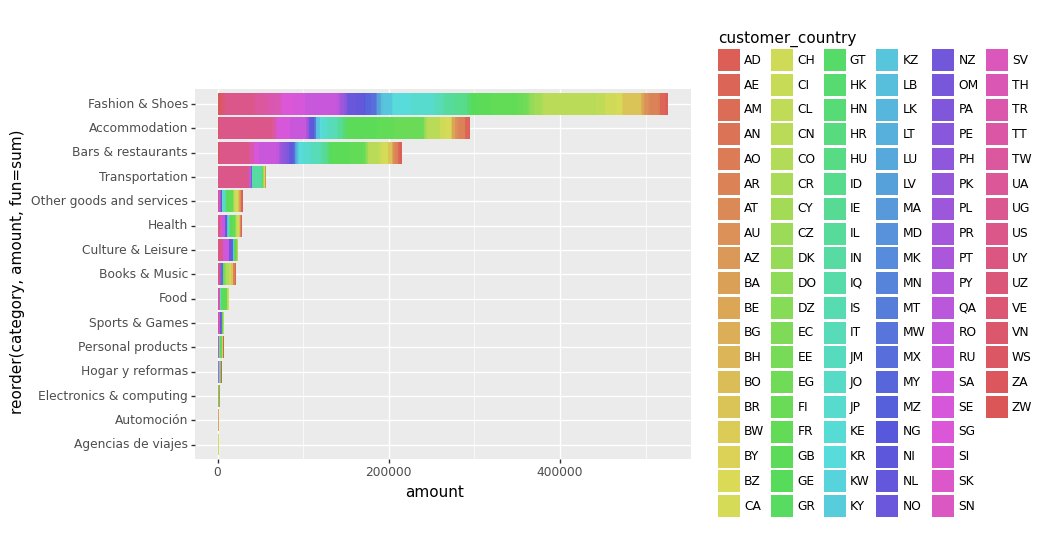

<ggplot: (123030022220)>

In [88]:
ggplot(df, aes(x = 'reorder(category, amount, fun=sum)', y = 'amount', fill='customer_country')) + geom_bar(stat="identity") + scale_x_discrete() + coord_flip()

NOTE: We need and interactive map and an interactive bar chart with 1 drop down and 1 slicer

1. The drop down would allow us to map either by:

 - Total Expenditure
 - Total Amount of Transactions
 - Average Ticket ( Total Expenditures/Transactions)

 2. Slicer would allow me to select top 1 to top 25 countries, all remaining countries should be grouped in other.

 3. Card at the top indicating Total Expenditure, Total Amount of Transactions and Average Ticket Size
 
 4. A horizontal bar chart sorted from highest to lowest based on the measure I am selecting above and plotting the amount of countries I select ( Top 1 to top 25 and the remaining need to go under other)

## ATRACT
- Travel credit cards with perks such a complementary lounge access, air mile earnings, co-branded benefits with airlines and travel partners or accelerated rewards on travel. Welcome bonus in miles. free stays in hotels.

- Consumers looking to save money oh their next trips (spend XXX amount and you will get XX reward), oportunities to help cut down cost of the vacations. BNPL strategies. 


## ENGAGE

- Incrase Target market by entering into the Mobile payment system to allow an increase in transaction specially from travellers of countries countries similar to Spain as this market is highly dependant on the local mobile pay system






Understanding total expenses, average ticket and number of transactions by country, category, time of the day.

Total Expenditure:

1. Top source markets based on total expenses, how much they account for out of the total tourism expenditure? This is a great KPI if we have figure YoY. Does not tell much if we can not see trends/evolution over time

Average Ticket:

2. **Most Active and valuable cardholders are those with a high average spend ticket:** The average ticket by country as a way to identify those nationalites that tend to spend more and tackle those countries with marketing campaings aiming to attrack more visitors and/or make them come back with recognition, priority services and loyalty programs, in which case it would be interesting to understand the categories we are they are more focused on.
   
3.  Mid/low average ticket population but high amount of transactions might be also a target population, if we identify what sort of category of products they are more interested on.

4. 

![Offers](../../../../../../../C:/Users/dianaf/OneDrive%20-%20Microsoft/Documents/GitHub/citibank_business_case_visual/Screenshot%202022-12-02%20122442.png)